# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Loading Rankings Data:

In [90]:
wood_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
wood_rankings.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013


In [28]:
steel_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
steel_rankings.head()

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013


## 2. Create a Function to Plot Rankings Over Time for 1 Roller Coaster:

None


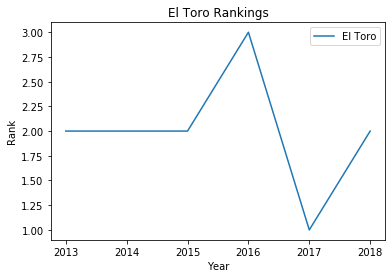

In [91]:
def rank_year(name,park):
    dfwood = wood_rankings[(wood_rankings['Name'] == name) & (wood_rankings['Park'] == park)]
    plt.plot(dfwood['Year of Rank'],dfwood['Rank'])
    plt.xlabel('Year')
    plt.ylabel("Rank")
    plt.title('El Toro Rankings')
    plt.legend([name],loc = 1)
    plt.show
    
print(rank_year('El Toro', 'Six Flags Great Adventure'))


## 3. Write a Function to Plot Rankings Over Time for 2 Roller Coasters:

None


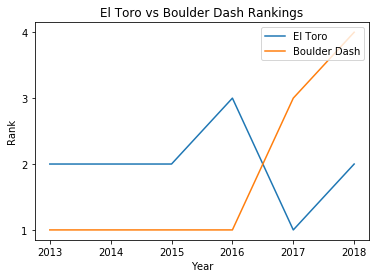

In [38]:
def rank_year2(name,park,name2,park2):
    dfwood1 = wood_rankings[(wood_rankings['Name'] == name) & (wood_rankings['Park'] == park)]
    dfwood2 = wood_rankings[(wood_rankings['Name'] == name2) & (wood_rankings['Park'] == park2)]
    ay = plt.subplot()
    plt.plot(dfwood1['Year of Rank'],dfwood1['Rank'])
    plt.plot(dfwood2['Year of Rank'],dfwood2['Rank'])
    plt.xlabel('Year')
    plt.ylabel("Rank")
    plt.title('El Toro vs Boulder Dash Rankings')
    plt.legend([name,name2],loc = 1)
    ay.set_yticks([1,2,3,4])
    plt.show
    
print(rank_year2('El Toro', 'Six Flags Great Adventure','Boulder Dash', 'Lake Compounce'))


## 4. Write a Function to Plot Top n Rankings Over Time:

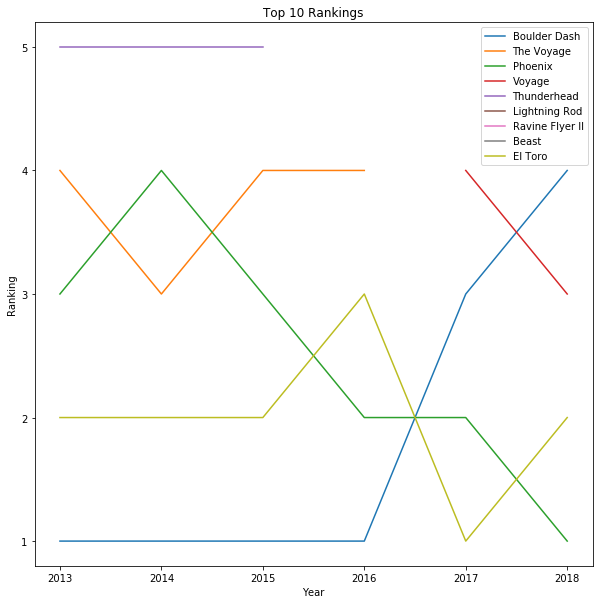

None


In [54]:
def top_rankings(df,n):
    top_n_rankings = df[df['Rank']<= n]
    fig, ax = plt.subplots(figsize=(10,10))
    for coaster in set(top_n_rankings['Name']):
        coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
        ax.plot(coaster_rankings['Year of Rank'],coaster_rankings['Rank'],label=coaster)
        ax.set_yticks([i for i in range(1,6)])
    plt.title('Top 10 Rankings')
    plt.xlabel('Year')
    plt.ylabel('Ranking')
    plt.legend(loc=0)
    plt.show()

print(top_rankings(wood_rankings,5))

## 5. Load Roller Coaster Data

In [55]:
coasters = pd.read_csv('roller_coasters.csv')
coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


## 6. Write a Function to Plot a Histogram of Column Values:

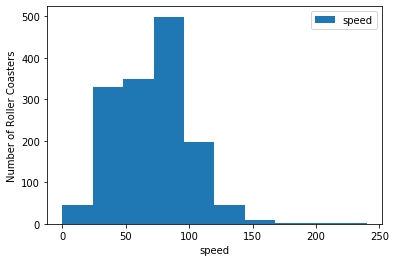

None


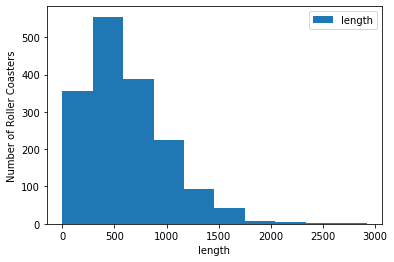

None


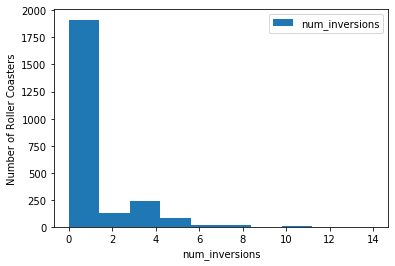

None


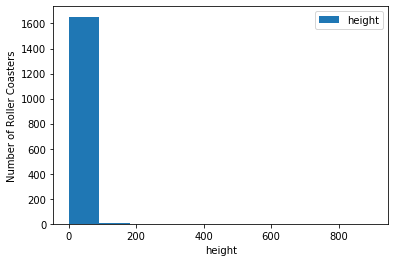

None


In [68]:
def hist_roller(df,column):
    plt.hist(df[column])
    legend = [column]
    plt.legend(legend)
    plt.xlabel(column)
    plt.ylabel('Number of Roller Coasters')
    heights = coasters[coasters['height'] <= 140]
    plt.show()


print(hist_roller(coasters,'speed'))
print(hist_roller(coasters,'length'))
print(hist_roller(coasters,'num_inversions'))
print(hist_roller(coasters,'height'))

## 7. Write a Functtion to Plot Inversions by Coasters at a Park:

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


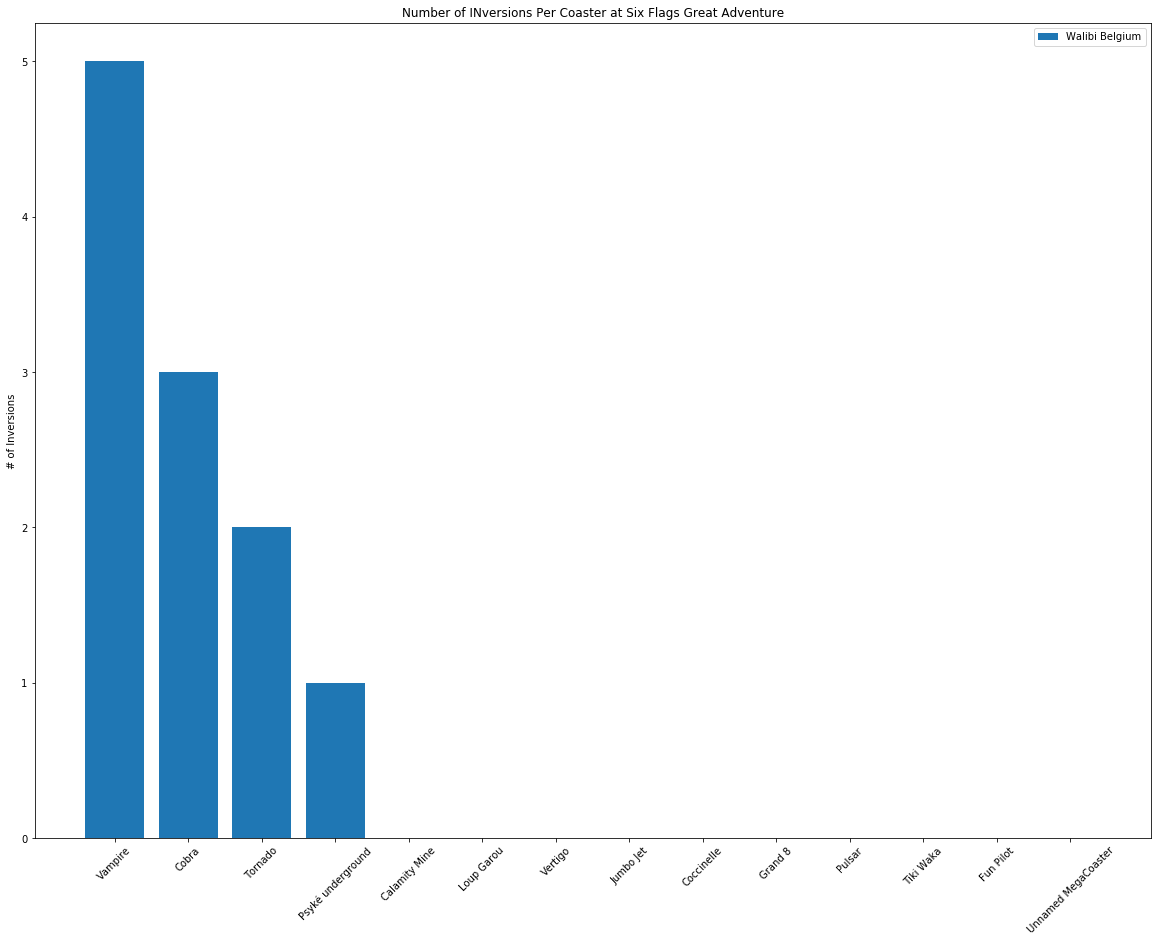

None


In [71]:
def bar_park(df,park):
    park_df = df[df['park'] == park]
    park_df = park_df.sort_values('num_inversions', ascending=False)
    roller_coaster = park_df['name']
    inversions = park_df['num_inversions']
    plt.figure(figsize = (20,15))
    ax = plt.subplot()
    ay = plt.subplot()
    plt.bar(range(len(roller_coaster)), inversions)
    ax.set_xticks(range(len(roller_coaster)))
    ax.set_xticklabels(roller_coaster)
    plt.xticks(rotation=45)
    plt.legend([park])
    plt.title('Number of INversions Per Coaster at Six Flags Great Adventure')
    plt.ylabel('# of Inversions')
    plt.show()

print(bar_park(coasters, 'Walibi Belgium'))

## 8. Write a Function to Plot a Pie Chart of Operating Status:

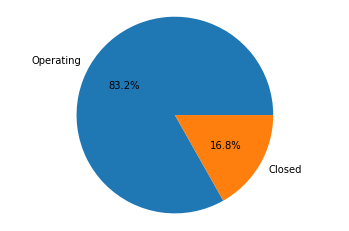

None


In [80]:
# 8
# Write a function to plot pie chart of operating status here
def pie(coasters):
    operating_coasters = coasters[coasters['status'] == 'status.operating']
    closed_coasters = coasters[coasters['status'] == 'status.closed.definitely']
    counts = [len(operating_coasters), len(closed_coasters)]
    plt.pie(counts, autopct='%0.1f%%', labels=['Operating','Closed'])
    plt.axis('equal')
    plt.show()
    
print(pie(coasters))

## 9. Write a Function to Create a Scatter Plot of Any Two Numeric Columns:

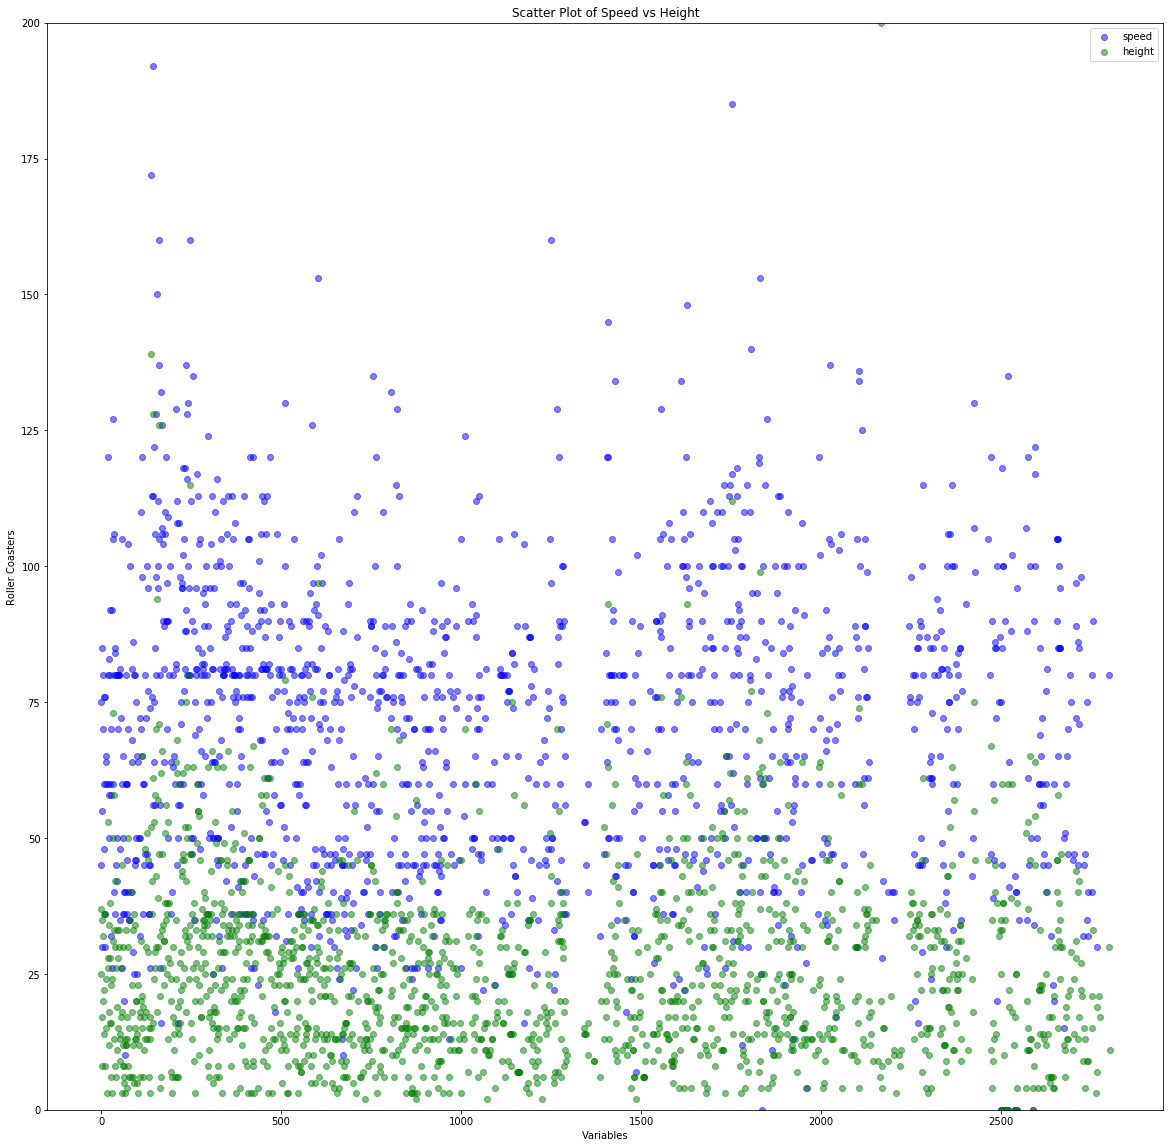

None


In [89]:
def scatter(df, column1,column2):
    c1 = df[column1]
    c2 = df[column2]
    x=range(len(df))
    plt.figure(figsize = (20,20))
    ax = plt.subplot()
    plt.scatter(x, c1, color= 'blue', alpha= 0.5)
    plt.scatter(x, c2, color='green', alpha=0.5)
    ax.set_xlabel('Variables')
    ax.set_ylabel('Roller Coasters')
    plt.title('Scatter Plot of Speed vs Height')
    plt.ylim(0, 200)
    plt.legend([column1, column2])
    plt.show()

print(scatter(coasters, 'speed', 'height'))